# Tutorial 1 - Getting Started
Simon Matthews (University of Iceland) and Kevin Wong (University of Leeds)

## Introduction

PyMelt is a Python package for calculating the melting behaviour of mantle comprising multiple lithologies. The module implements the melting equations developed by Phipps Morgan (2001) to calculate the melting behaviour of mantle comprising any chosen lithology. 

Currently supported calculations:

* Adiabatic decompression melting
* Isobaric melting

Parameters that can be calculated:

* The geotherm for decompressing mantle
* Melt fractions for each lithology
* Crustal thickness for passive-upwelling at a mid-ocean ridge
* Crystallisation temperatures (following the method in Matthews et al., 2016)
* Trace element concentrations from mantle melting (following the method in McKenzie and O'Nions, 1991)

## Installing pyMelt
See the github readme or the readthedocs documentation for installation instructions.

Once pyMelt is installed, it can be imported:

In [1]:
import pyMelt as m

Adding `as m` to the end of the instruction allows us to use the shorthand `m` when accessing the module.

We will also use the `numpy`, `pandas`, and `matplotlib.pyplot` libraries in this tutorial:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lithology objects
PyMelt offers a number of different lithologies that can be thermodynamically modelled either separately or in combination. Among these lithologies are the new parameterisations for KLB-1, KG1, and silica-saturated pyroxenite of Matthews et al., 2021. The total lithologies included in the module are:

* ```m.lithologies.ball.depleted_mantle```: lherzolite (Ball et al., 2022)
* ```m.lithologies.ball.primitive_mantle```: lherzolite (Ball et al., 2022)
* ```m.lithologies.ball.mixed_mantle```: lherzolite (Ball et al., 2022)
* ```m.lithologies.katz.lherzolite```: lherzolite (Katz et al., 2003)
* ```m.lithologies.matthews.klb1```: KLB-1 lherzolite (Matthews et al., 2021)
* ```m.lithologies.matthews.kg1```: KG1 silica-undersaturated pyroxenite (Matthews et al., 2021)
* ```m.lithologies.matthews.eclogite```: silica-saturated pyroxenite (Matthews et al., 2021)
* ```m.lithologies.mckenzie.lherzolite```: lherzolite (McKenzie & Bickle (1988)
* ```m.lithologies.pertermann.g2```: G2 pyroxenite (Pertermann & Hirschmann, 2002)
* ```m.lithologies.shorttle.kg1```: KG1 silica-undersaturated pyroxenite (Shorttle et al. 2014)
* ```m.lithologies.shorttle.harzburgite```: non-melting harzburgite (after Shorttle et al., 2014)

Each lithology is treated as a Python object, and an instance can be assigned to a variable:

In [3]:
lz = m.lithologies.matthews.klb1()
px = m.lithologies.matthews.kg1()
hz = m.lithologies.shorttle.harzburgite()

Each lithology object contains methods describing its thermodynamic properties. Most of these methods are hidden and they vary from model to model, depending on how it is formulated. However, every lithology has the following methods:
* ```TSolidus(P)```: temperature of the lithology solidus (&deg;C) at a given pressure in GPa
* ```TLiquidus(P)```: temperature of the lithology liquidus (&deg;C) at a given pressure in GPa
* ```F(P, T)```: melt fraction of the lithology at a given pressure (GPa) and temperature (&deg;C)
* ```dTdF(P, T)```: dT/dF of the lithology at a constant pressure
* ```dTdP(P, T)```: dT/dP of the lithology at a constant melt fraction
These can be called to get the properties of the lithology at particular temperatures and pressures, for example:

In [4]:
lz_solidus = lz.TSolidus(2.0)
lz_liquidus = lz.TLiquidus(2.0)
lz_F = lz.F(2.0, 1500.0)
print("At 2 GPa the solidus temperature is {:.1f}˚C \n and the liquidus temperature is: {:.1f}˚C. \nAt 1500˚C and 2 GPa the melt fraction is {:.2f}".format(lz_solidus, lz_liquidus, lz_F))

At 2 GPa the solidus temperature is 1397.6˚C 
 and the liquidus temperature is: 1911.3˚C. 
At 1500˚C and 2 GPa the melt fraction is 0.25


Throughout pyMelt the units of temperature are always ˚C, and the units of pressure are always GPa.

We could go one step further and make a plot of the solidus and liquidus temperature for one of the lithologies:

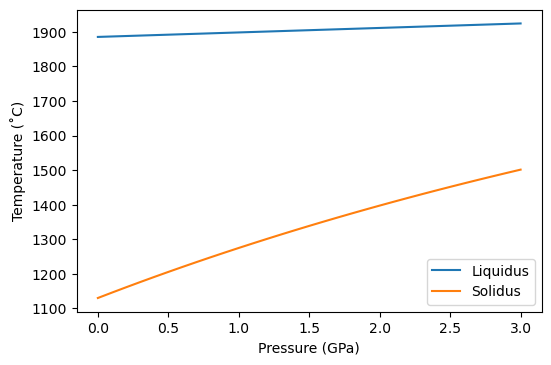

In [5]:
p = np.linspace(0.0,3.0,31)

tliq = np.zeros(np.shape(p))
tsol = np.zeros(np.shape(p))

for i in range(len(p)):
    tliq[i] = lz.TLiquidus(p[i])
    tsol[i] = lz.TSolidus(p[i])

f,a = plt.subplots(dpi=100)
a.plot(p, tliq, label='Liquidus')
a.plot(p, tsol, label='Solidus')
a.set_xlabel('Pressure (GPa)')
a.set_ylabel('Temperature (˚C)')
a.legend()
plt.show()

To see a list of the methods available for any python object, the following can be used within a Jupyter notebook to get access to its documentation.

In [6]:
lz?

Type:        klb1
String form: <pyMelt.lithologies.matthews.klb1 object at 0x7fc0fec2b550>
File:        ~/opt/anaconda3/lib/python3.7/site-packages/pyMelt/lithologies/matthews.py
Docstring:  
Implementation of the KLB1 melting model from Matthews et al. (2021).

To use the same format of parameterisation for another lithology, the parameter values
may be changed. They are provided as a dictionary during initialisation of the class.

- Mcpx:   Mass fraction of cpx in the source. Controls the transition to low-productivity
  harzburgite-type melting.
- A1:     Parameter used to define solidus.
- A2:     Parameter used to define solidus.
- A3:     Parameter used to define solidus.
- A4:               Parameter used to define solidus.
- B1:     Parameter used to define liquidus.
- B2:     Parameter used to define liquidus.
- B3:     Parameter used to define liquidus.
- B4:     Parameter used to define liquidus.
- C:        Parameter used to define lherzolite-liquidus.
- beta1:  Parameter u

## Mantle objects

A ```mantle``` object is constructed from one or multiple lithologies in specified proportions, and comprises three arguments.

* `lithologies`: a list of the defined lithology objects to be considered in the melting calculation.
* `proportions`: a list of floats (of equivalent length to the list of Argument 1) comprising the relative proportions of the lithologies listed in Argument 1. The floats do not have to be normalised.
* `names`: a list of strings (of equivalent length to the other lists) comprising the names by which the lithologies  will be labelled. These strings will be used in data outputs. This can be ommitted, but the results will be unlabelled.

As a demonstration, we can define a three-component mantle. Note that the code is not limited to three lithologies, and can (in principle) have any number of lithologies:

In [7]:
mantle = m.mantle([lz, px, hz], [6, 2, 2], ['Lz', 'Px', 'Hz'])

Here are some of the methods that can be called from the ```mantle``` object:

The bulk thermodynamic properties of the solid mantle can be called:

In [8]:
mantle.bulkProperties()

{'alpha': 38.0, 'CP': 1000.0, 'rho': 3.2899999999999996}

Does this change once the mantle is molten?

In [9]:
mantle.bulkProperties(T=1400.0, P=2.0)

{'alpha': 40.67799443726366, 'CP': 1000.0, 'rho': 3.2517429366105186}

To find out when one of the lithologies will start melting, we can call either the `solid_intersection_isobaric` method if we are interested in a particular pressure, or we can find out at what pressure the mantle will beginning melting during decompression for a given $T_p$ (potential temperature):

In [10]:
mantle.solidusIntersectionIsobaric(2.0)

array([1397.57332987, 1292.55257242,           inf])

In [11]:
mantle.solidusIntersection(1450.0)

array([3.12437893, 4.38523594,        nan])

Notice that three values were returned, one for each lithology. Since the third lithology is the non-melting harzburgite from Shorttle et al. (2014), it doesn't have a solidus intersection. If we just wanted to know at what temperature the mantle would start melting, but we didn't care which lithology, we could write:

In [12]:
np.nanmin(mantle.solidusIntersectionIsobaric(2.0))

1292.5525724175186

We often talk about mantle temperatures in terms of $T_p$, but sometimes we want to know what temperature this equates to in the solid mantle. The `adiabat` method will do this. To see the required inputs we can use:

In [13]:
mantle.adiabat?

Signature: mantle.adiabat(P, Tp)
Docstring:
Calculates the actual temperature of the solid mantle at a given pressure, given the
potential temperature.

Parameters
----------
P :  float or numpy.array
    Pressure in GPa.
Tp : float or numpy.array
    Potential temperature in degC.

Returns
-------
float or numpy.array
    Temperature of the mantle at the given pressure and Tp.
File:      ~/opt/anaconda3/lib/python3.7/site-packages/pyMelt/mantle_class.py
Type:      method


So we must specify the pressure and temperature. Note that the documentation specifies this will be the temperature of **solid** mantle. The adiabatic path taken by semi-molten mantle must be calculated by running a full decompression melting calculation (see below). 

In [14]:
mantle.adiabat(10.0, 1300.0)

1492.6105400862434

Stepping back into the world of partially-molten mantle, perhaps we want to know the melt fractions of each lithology at a given temperature and pressure. Just like the pure lithology objects, the `F` method will perform this calculation:

In [15]:
mantle.F(2.0, 1400.0)

array([0.00185681, 0.47264287, 0.        ])

## Adiabatic decompression melting
To calculate the consequences of adiabatic decompression melting for this ```mantle``` object, the method ```adiabaticMelt``` can be called which will return a new ```meltingColumn``` object:

In [16]:
column = mantle.adiabaticMelt(1400.0)

This performed the calculation for a $T_p$ of 1400˚C. The way the calculation is performed can be modified, look up the documentation for the other (optional) arguments.

What is going on behind the scenes? This method performs a simultaneous integration of $\frac{dF}{dP}$ and $\frac{dT}{dP}$ to obtain the thermal gradient through the melting region. The melt fraction $F$ of each lithology is then calculated at the same time. Integration is performed using a fourth-order Runge-Kutta algorithm.

pyMelt provides a built in method `plot` to quickly visualise the results of the calculation.

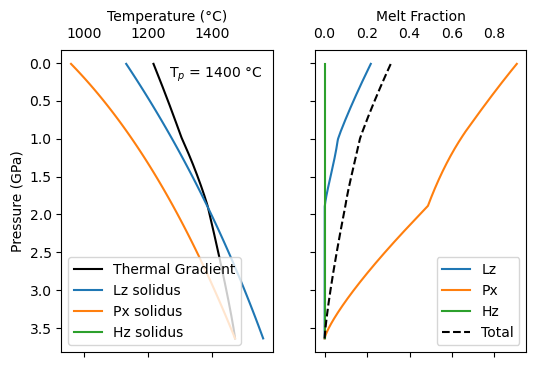

In [17]:
f,a = column.plot()

Often we want to use these results further, however. We can access the results, like temperature:

In [18]:
column.T

0      1471.826036
1      1471.745419
2      1471.635224
3      1471.519684
4      1471.400187
          ...     
903    1218.808663
904    1218.428828
905    1218.048819
906    1217.668638
907    1217.288284
Name: T, Length: 908, dtype: float64

This returned a `pandas.Series` object, with 908 values. To keep the notebook tidy, the printout is automatically truncated. But what pressures do these correspond to?

In [19]:
column.P

0      3.639151
1      3.635151
2      3.631151
3      3.627151
4      3.623151
         ...   
903    0.027151
904    0.023151
905    0.019151
906    0.015151
907    0.011151
Name: P, Length: 908, dtype: float64

What about melt fraction?

In [20]:
column.F

0      0.000000
1      0.000039
2      0.000096
3      0.000163
4      0.000237
         ...   
903    0.308970
904    0.309622
905    0.310275
906    0.310928
907    0.311582
Length: 908, dtype: float64

This returns the total melt fraction, but what about the melt fractions for each lithology?

In [21]:
column.lithologies['Lz'].F

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
903    0.214646
904    0.215343
905    0.216042
906    0.216740
907    0.217440
Name: F, Length: 908, dtype: float64

In [22]:
column.lithologies['Px'].F

0      0.000000
1      0.000197
2      0.000479
3      0.000813
4      0.001184
         ...   
903    0.900913
904    0.902081
905    0.903250
906    0.904420
907    0.905592
Name: F, Length: 908, dtype: float64

Here we can see the pyroxenite is almost completely molten, but the lherzolite has only achieved 21.5% melting. The pyroxenite has a sufficiently low abundance that it only contributes a small amount to the aggregate melt fraction.

To save this for further work outside of python, we could construct a `pandas.DataFrame`.

In [23]:
results = pd.DataFrame()

results['T'] = column.T
results['P'] = column.P
results['F_total'] = column.F
results['F_lz'] = column.lithologies['Lz'].F
results['F_px'] = column.lithologies['Px'].F
results

,T,P,F_total,F_lz,F_px
0,1471.826036,3.639151,0.000000,0.000000,0.000000
1,1471.745419,3.635151,0.000039,0.000000,0.000197
2,1471.635224,3.631151,0.000096,0.000000,0.000479
3,1471.519684,3.627151,0.000163,0.000000,0.000813
4,1471.400187,3.623151,0.000237,0.000000,0.001184
...,...,...,...,...,...
903,1218.808663,0.027151,0.308970,0.214646,0.900913
904,1218.428828,0.023151,0.309622,0.215343,0.902081
905,1218.048819,0.019151,0.310275,0.216042,0.903250
906,1217.668638,0.015151,0.310928,0.216740,0.904420


Calling `results.to_csv('my_results.csv')` will save this as a csv file in your working directory.

## Calculating Crustal Thickness at a MOR
Crustal thickness can be calculated assuming passive decompression melting in a triangular spreading centre melting region similar to that of a mid-ocean ridge. As part of the ```pyMelt.geosettings``` module, there is a ```spreadingCentre``` class. When a ```spreadingCentre``` object is created from the ```meltingColumn``` object, the melt fractions are integrated to obtain the crustal thickness, and more shallow melts are removed.

In [24]:
morb = m.geosettings.spreadingCentre(column)

The new object we created contains the attributes:
* ```tc```: integrated crustal thickness at the point where the pressure it exerts is equal to the calculation pressure.
* ```P_base_of_crust```: pressure at the base of the crust, at the point where the pressure the generated crust exerts is equal to the calculation pressure.
* ```lithology_contributions``` integrated proportion of generated crust derived from each lithology where the pressure the generated crust exerts is equal to the calculation pressure.
As well as many of the same attributes as the column.

To see the crustal thickness:

In [25]:
morb.tc

11.749475892828006

If we want to know how much each lithology contributes to the crust, we can call the `lithology_contributions` attribute:

In [26]:
morb.lithology_contributions

{'Lz': 0.18695473789221223, 'Px': 0.8130452621077877, 'Hz': 0.0}

In this case the pyroxenite dominates the accumulated melt.

## Melt liquidus temperature
pyMelt can be used to estimate the liquidus of mantle-derived melts (crystallisation temperature). This is achieved using the ```meltCrystallisationT()``` method. Triangular integration must have been performed beforehand to achieve a liquidus temperature, else an error will be returned.


In [27]:
morb.meltCrystallisationT()

(1251.5461972868964, 1344.235728651589)

This function returns two crystallisation temperature estimates, the first for the melts at the top of the melting column (the shallowest melts), and the second for the melts at the bottom of the melting column (the deepest melts). Both cases assume thermal (and chemical) isolation of the melts during ascent.

See Matthews et al. (2016) or Matthews et al. (2021) for more information about this calculation. To recreate the results from Matthews et al. (2021), the lower crystallisation temperature estimate should be used.

If we want to change the pressure at which melts are extracted and subsequently crystallise, we can adjust the arguments ```ShallowMeltP``` and ```MeltStorageP``` respectively.   

In [28]:
morb.meltCrystallisationT(ShallowMeltP=0.5, MeltStorageP=0.1)

(1246.9686620926188, 1333.3089115412424)

## Calculating Melt Flux at an Ocean Island
Another class in the ```pyMelt.geosetting``` module is ```intraPlate```, a very simplistic implementation of a plume upwelling beneath lithosphere. This requires a few more arguments than when creating a ```spreadingCentre```, given by the documentation:

In [29]:
m.geosettings.intraPlate?

Init signature:
m.geosettings.intraPlate(
    MeltingColumn,
    P_lithosphere,
    relative_density=None,
    viscosity=1e+19,
    radius=100000.0,
    weightingFunction=None,
    **kwargs,
)
Docstring:     
Implementation of an intra-plate volcanic province, representing mantle upwelling beneath
lithosphere. The melt flux is calculated assuming flow in a deformable plume conduit (Turcotte
and Schubert, 2002). At present a constant rate of decompression throughout the conduit is
assumed, likely leading to inaccuracies in the estimated melt chemistry.

Parameters
----------
MeltingColumn : pyMelt.meltingcolumn_classes.MeltingColumn
    The melting column from which to construct the geological setting.
P_lithosphere : float, default: 0.0
    The pressure at the base of the lithosphere in a continental rift. If this includes the
    igneous crust, set `extract_melt` to True. Defaults to 0.0, the case of a a mid-ocean
    ridge.
relative_density : float or None, default: None
    The valu

If you don't wish to calculate a melt flux, the ```relative_density``` argument may be ignored. You might want to do this if you are calculating melt chemistry (see Tutorial 3), or if you want an easy way of cutting off the top of the melting column. The relative density of the plume compared with ambient mantle determines the upwelling velocity, and therefore the melt production over time. pyMelt does not directly estimate lithology density. The approach used by Shorttle et al. (2014) and Matthews et al. (2021) was to calculate lithology densities as a a function of temperature (at fixed pressure for simplicity) using THERMOCALC. A lookup table was then used to extract an appropriate $\Delta \rho$. To illustrate the calculation we will use an abitrary value of $\Delta \rho = 0.2$ kg m$^{-3}$:

In [30]:
oib = m.geosettings.intraPlate(column, P_lithosphere=1.2, relative_density=0.2)

To print the calculated melt flux (in m$^3$ s$^{-1}$):

In [31]:
oib.melt_flux

1.155224588059439

If active upwelling is considered then we can assign a function for weighting melts generated at depth. PyMelt provides an inbuilt exponential function for modelling melt weighting, which can be implemented as follows:

In [32]:
oib_active = m.geosettings.intraPlate(column, P_lithosphere=1.2, relative_density=0.2, 
                                      weightingFunction=m.geosettings.weighting_expdecay,
                                     weighting_wavelength=1.0)

What effect does this have on the melt flux?

In [33]:
oib_active.melt_flux

0.6840551423801696

We can see here that melt flux has decreased. When a weighting function is used the calculation aims to have an upwelling velocity of zero at the base of the lithosphere. The amount of melt fluxing is therefore lower compared to the simple case where weighting isn't considered.

It is worth noting here that active upwelling applied to the `spreadingCentre` _increases_ the amount of melts generated, as the zero-velocity constraint is not applied to this geosetting.  

## References

Ball, P. W., T. Duvernay, and D. R. Davies (2022). A Coupled Geochemical‐Geodynamic Approach for Predicting Mantle Melting in Space and Time. Geochemistry, Geophysics, Geosystems 23.4 (2022): e2022GC010421. <https://doi.org/10.1029/2022GC010421>

Ball, P., Duvernay, T., & Davies, D. R. (2022). A coupled geochemical-geodynamical approach for predicting mantle melting in space and time. In press.

Katz, R. F., Spiegelman, M., & Langmuir, C. H. (2003). A new parameterization of hydrous mantle melting. Geochemistry, Geophysics, Geosystems, 4(9), 1073. <https://doi.org/10.1029/2002GC000433>

Matthews, S., Shorttle, O., & Maclennan, J. (2016). The temperature of the Icelandic mantle from olivine-spinel aluminum exchange thermometry. Geochemistry, Geophysics, Geosystems, 17(11), 4725–4752. <https://doi.org/10.1002/2016GC006497>

Matthews, S., Wong, K., Shorttle, O., Edmonds, M., & Maclennan, J. (2021). Do olivine crystallization temperatures faithfully record mantle temperature variability? Geochemistry, Geophysics, Geosystems. <https://doi.org/10.1029/2020GC009157>

McKenzie, D., & O’Nions, R. K. (1991). Partial Melt Distributions from Inversion of Rare Earth Element Concentrations. Journal of Petrology, 32(5), 1021–1091. <https://doi.org/10.1093/petrology/32.5.1021>

Pertermann, M., & Hirschmann, M. M. (2003). Partial melting experiments on a MORB-like pyroxenite between 2 and 3 GPa: Constraints on the presence of pyroxenite in basalt source regions from solidus location and melting rate. Journal of Geophysical Research: Solid Earth, 108(B2), 2125. <https://doi.org/10.1029/2000JB000118>

Phipps Morgan, J. (2001). Thermodynamics of pressure release melting of a veined plum pudding mantle. Geochemistry, Geophysics, Geosystems, 2(4), 1001. <https://doi.org/10.1029/2000GC000049>

Shorttle, O., Maclennan, J., & Lambart, S. (2014). Quantifying lithological variability in the mantle. Earth and Planetary Science Letters, 395, 24–40. <https://doi.org/10.1016/j.epsl.2014.03.040>
